# 🌿 VayuSense: Data Cleaning and Exploratory Data Analysis

This notebook performs data cleaning, preprocessing, and exploratory data analysis for the VayuSense carbon emission prediction platform.

## 📋 Table of Contents
1. Data Loading and Initial Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Data Export for Modeling

## 1. Import Required Libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style
# Set style - use default if seaborn style not available
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('default')
sns.set_palette('husl')

## 2. Load and Explore the Raw Data

In [6]:
# Load the dataset
df_raw = pd.read_excel('../data/data-set.xls')

# Display basic information
print(f"Dataset shape: {df_raw.shape}")
print(f"\nColumn names: {list(df_raw.columns)}")
print(f"\nData types:\n{df_raw.dtypes}")
print(f"\nFirst few rows:")
df_raw.head()

Dataset shape: (13512, 28)

Column names: ['Country code', 'Country name', 'Series code', 'Series name', 'SCALE', 'Decimals', 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Data types:
Country code    object
Country name    object
Series code     object
Series name     object
SCALE           object
Decimals        object
1990            object
1991            object
1992            object
1993            object
1994            object
1995            object
1996            object
1997            object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
dtype: object

First few rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,..,..,..,..,..,..,29.57481,..,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,..,..,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,..,..,..,..,..,..,0.208235,..,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,..,..,..,..,..,..,4.967875,..,..,..,..,..,..,..,..,..,..,..


In [7]:
# Check unique series (indicators)
print("Unique indicators in the dataset:")
indicators = df_raw[['Series code', 'Series name']].drop_duplicates()
for idx, row in indicators.iterrows():
    print(f"{row['Series code']}: {row['Series name']}")

Unique indicators in the dataset:
AG.LND.EL5M.ZS: Land area below 5m (% of land area)
AG.LND.IRIG.AG.ZS: Agricultural land under irrigation (% of total ag. land)
AG.YLD.CREL.KG: Cereal yield (kg per hectare)
BX.KLT.DINV.WD.GD.ZS: Foreign direct investment, net inflows (% of GDP)
EG.ELC.ACCS.ZS: Access to electricity (% of total population)
EG.USE.COMM.GD.PP.KD: Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)
EG.USE.PCAP.KG.OE: Energy use per capita (kilograms of oil equivalent)
EN.ATM.CO2E.KT: CO2 emissions, total (KtCO2)
EN.ATM.CO2E.PC: CO2 emissions per capita (metric tons)
EN.ATM.CO2E.PP.GD.KD: CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)
EN.ATM.GHGO.KT.CE: Other GHG emissions, total (KtCO2e)
EN.ATM.METH.KT.CE: Methane (CH4) emissions, total (KtCO2e)
EN.ATM.NOXE.KT.CE: Nitrous oxide (N2O) emissions, total (KtCO2e)
EN.CLC.AERT: Annex-I emissions reduction target
EN.CLC.DRSK.XQ: Disaster risk reduction progress score (1-5 scale; 5=best)
EN.CLC.GHGR.MT.CE: GHG

In [8]:
# Check for CO2 emission related indicators
co2_indicators = indicators[indicators['Series name'].str.contains('CO2|carbon|emission', case=False, na=False)]
print("CO2 emission related indicators:")
co2_indicators

CO2 emission related indicators:


,Series code,Series name
1631,EN.ATM.CO2E.KT,"CO2 emissions, total (KtCO2)"
1864,EN.ATM.CO2E.PC,CO2 emissions per capita (metric tons)
2097,EN.ATM.CO2E.PP.GD.KD,"CO2 emissions per units of GDP (kg/$1,000 of 2..."
2330,EN.ATM.GHGO.KT.CE,"Other GHG emissions, total (KtCO2e)"
2563,EN.ATM.METH.KT.CE,"Methane (CH4) emissions, total (KtCO2e)"
2796,EN.ATM.NOXE.KT.CE,"Nitrous oxide (N2O) emissions, total (KtCO2e)"
3029,EN.CLC.AERT,Annex-I emissions reduction target
3495,EN.CLC.GHGR.MT.CE,GHG net emissions/removals by LUCF (MtCO2e)
4427,EN.CLC.ICER,Issued Certified Emission Reductions (CERs) fr...
4660,EN.CLC.IERU,Issued Emission Reduction Units (ERUs) from JI...


## 3. Data Cleaning and Preprocessing

In [9]:
# Replace '..' with NaN
df_clean = df_raw.replace('..', np.nan)

# Convert year columns to numeric
year_columns = [col for col in df_clean.columns if str(col).isdigit()]
for col in year_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print(f"Year columns: {year_columns}")

Year columns: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


In [10]:
# Reshape data from wide to long format
id_vars = ['Country code', 'Country name', 'Series code', 'Series name', 'SCALE', 'Decimals']
df_long = pd.melt(df_clean, 
                  id_vars=id_vars,
                  value_vars=year_columns,
                  var_name='Year',
                  value_name='Value')

# Convert Year to integer
df_long['Year'] = df_long['Year'].astype(int)

print(f"Reshaped data shape: {df_long.shape}")
df_long.head()

Reshaped data shape: (297264, 8)


,Country code,Country name,Series code,Series name,SCALE,Decimals,Year,Value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.574810
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


In [11]:
# Pivot to have indicators as columns
df_pivot = df_long.pivot_table(
    index=['Country code', 'Country name', 'Year'],
    columns='Series code',
    values='Value',
    aggfunc='first'
).reset_index()

print(f"Pivoted data shape: {df_pivot.shape}")
print(f"\nColumns: {list(df_pivot.columns)}")

Pivoted data shape: (5085, 51)

Columns: ['Country code', 'Country name', 'Year', 'AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE', 'EN.ATM.NOXE.KT.CE', 'EN.CLC.DRSK.XQ', 'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP', 'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS', 'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ', 'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD', 'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS', 'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS', 'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.MLR.INCD', 'SH.STA.ACSN', 'SH.STA.MALN.ZS', 'SI.POV.DDAY', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.GROW', 'SP.URB.TOTL']


In [12]:
# Check missing values percentage for each column
missing_pct = (df_pivot.isnull().sum() / len(df_pivot) * 100).sort_values(ascending=False)
print("Missing values percentage by column:")
print(missing_pct[missing_pct > 0])

Missing values percentage by column:
Series code
EN.CLC.IERU             99.842675
EN.CLC.HJIP             99.665683
EN.CLC.ICER             98.525074
EN.CLC.DRSK.XQ          98.348083
EN.CLC.HCDM             98.190757
EG.ELC.ACCS.ZS          98.053097
SH.MLR.INCD             97.836775
EN.CLC.MDAT.ZS          96.696165
EN.CLC.HPPT.MM          96.066863
ER.H2O.FWTL.ZS          94.473943
IE.PPI.WATR.CD          93.628319
SH.MED.NUMW.P3          92.605703
AG.LND.IRIG.AG.ZS       91.307768
EN.POP.EL5M.ZS          91.071780
AG.LND.EL5M.ZS          91.071780
IQ.CPA.PUBS.XQ          90.993117
SH.STA.MALN.ZS          89.695182
IC.BUS.EASE.XQ          89.262537
IE.PPI.TRAN.CD          89.262537
SI.POV.DDAY             88.829892
EN.ATM.GHGO.KT.CE       88.515241
EN.ATM.METH.KT.CE       88.200590
EN.ATM.NOXE.KT.CE       88.200590
IE.PPI.ENGY.CD          83.185841
EN.CLC.GHGR.MT.CE       81.455261
SH.STA.ACSN             80.963618
SH.H2O.SAFE.ZS          80.570305
SH.MED.PHYS.ZS          67.492625

In [13]:
# Create a dictionary for indicator names
indicator_names = dict(zip(indicators['Series code'], indicators['Series name']))

# Identify and keep relevant columns for carbon emission prediction
# Focus on energy, economic, and emission indicators
relevant_patterns = ['CO2', 'GDP', 'population', 'energy', 'electricity', 'fuel', 'renewable', 
                    'fossil', 'combustion', 'urban', 'forest', 'agriculture', 'industry']

relevant_columns = ['Country code', 'Country name', 'Year']
for col in df_pivot.columns:
    if col in indicator_names:
        indicator_name = indicator_names[col].lower()
        if any(pattern.lower() in indicator_name for pattern in relevant_patterns):
            relevant_columns.append(col)

print(f"Selected {len(relevant_columns)} relevant columns out of {len(df_pivot.columns)}")
print("\nSelected indicators:")
for col in relevant_columns[3:]:  # Skip country and year columns
    if col in indicator_names:
        print(f"{col}: {indicator_names[col]}")

Selected 23 relevant columns out of 51

Selected indicators:
BX.KLT.DINV.WD.GD.ZS: Foreign direct investment, net inflows (% of GDP)
EG.ELC.ACCS.ZS: Access to electricity (% of total population)
EG.USE.COMM.GD.PP.KD: Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)
EG.USE.PCAP.KG.OE: Energy use per capita (kilograms of oil equivalent)
EN.ATM.CO2E.KT: CO2 emissions, total (KtCO2)
EN.ATM.CO2E.PC: CO2 emissions per capita (metric tons)
EN.ATM.CO2E.PP.GD.KD: CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)
EN.ATM.GHGO.KT.CE: Other GHG emissions, total (KtCO2e)
EN.ATM.METH.KT.CE: Methane (CH4) emissions, total (KtCO2e)
EN.ATM.NOXE.KT.CE: Nitrous oxide (N2O) emissions, total (KtCO2e)
EN.CLC.GHGR.MT.CE: GHG net emissions/removals by LUCF (MtCO2e)
EN.POP.EL5M.ZS: Population below 5m (% of total)
EN.URB.MCTY.TL.ZS: Population in urban agglomerations >1million (%)
IE.PPI.ENGY.CD: Invest. in energy w/ private participation ($)
NY.GDP.MKTP.CD: GDP ($)
SI.POV.DDAY: Population l

In [14]:
# Create cleaned dataset with relevant columns
df_cleaned = df_pivot[relevant_columns].copy()

# Drop columns with more than 50% missing values
threshold = 0.5
missing_pct = df_cleaned.isnull().sum() / len(df_cleaned)
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with >{threshold*100}% missing values")
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

print(f"\nCleaned dataset shape: {df_cleaned.shape}")

Dropping 8 columns with >50.0% missing values

Cleaned dataset shape: (5085, 15)


In [15]:
# Handle remaining missing values
# For time series data, forward fill then backward fill by country
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'Year']

for col in numeric_columns:
    df_cleaned[col] = df_cleaned.groupby('Country code')[col].transform(lambda x: x.ffill().bfill())

# Check remaining missing values
print("Missing values after imputation:")
print(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

Missing values after imputation:
Series code
BX.KLT.DINV.WD.GD.ZS     525
EG.USE.COMM.GD.PP.KD    1206
EG.USE.PCAP.KG.OE       1052
EN.ATM.CO2E.KT           350
EN.ATM.CO2E.PC           350
EN.ATM.CO2E.PP.GD.KD     766
EN.URB.MCTY.TL.ZS       2391
NY.GDP.MKTP.CD           286
SP.POP.GROW               21
SP.URB.GROW              243
SP.URB.TOTL              222
dtype: int64


In [16]:
# Drop rows with any remaining missing values
df_cleaned = df_cleaned.dropna()

# Save cleaned data
df_cleaned.to_csv('../data/cleaned_country_data.csv', index=False)
print(f"Cleaned data saved! Final shape: {df_cleaned.shape}")

# Create readable column names mapping
column_mapping = {}
for col in df_cleaned.columns:
    if col in indicator_names:
        # Create shorter, readable names
        name = indicator_names[col]
        if 'CO2 emissions' in name and 'total' in name:
            column_mapping[col] = 'CO2_emissions_kt'
        elif 'CO2 emissions' in name and 'per capita' in name:
            column_mapping[col] = 'CO2_per_capita'
        elif 'CO2 emissions' in name and 'GDP' in name:
            column_mapping[col] = 'CO2_per_GDP'
        elif 'GDP' in name and 'current US$' in name:
            column_mapping[col] = 'GDP_current_USD'
        elif 'Population, total' in name:
            column_mapping[col] = 'Population_total'
        elif 'Population growth' in name:
            column_mapping[col] = 'Population_growth'
        elif 'Urban population' in name and 'total' in name:
            column_mapping[col] = 'Urban_population_total'
        elif 'Urban population' in name and 'growth' in name:
            column_mapping[col] = 'Urban_population_growth'
        elif 'Energy use' in name:
            column_mapping[col] = 'Energy_use_kg_oil_equiv'
        elif 'Electric power consumption' in name:
            column_mapping[col] = 'Electricity_consumption_kWh'
        elif 'Renewable energy consumption' in name:
            column_mapping[col] = 'Renewable_energy_pct'
        elif 'Urban population' in name and '%' in name:
            column_mapping[col] = 'Urban_population_pct'
        elif 'Forest area' in name:
            column_mapping[col] = 'Forest_area_pct'
        else:
            column_mapping[col] = col

# Apply column mapping
df_cleaned.rename(columns=column_mapping, inplace=True)
df_cleaned.head()

Cleaned data saved! Final shape: (2386, 15)


Series code,Country code,Country name,Year,BX.KLT.DINV.WD.GD.ZS,Energy_use_kg_oil_equiv,Energy_use_kg_oil_equiv,CO2_emissions_kt,CO2_per_capita,CO2_per_GDP,EN.URB.MCTY.TL.ZS,NY.GDP.MKTP.CD,Population_growth,SP.POP.TOTL,Urban_population_growth,SP.URB.TOTL
65,AGO,Angola,1990,-3.263096,172.978279,569.242999,4429.736,0.428613,130.244398,15.171061,1.026019e+10,2.771320,10335052.0,6.505966,3834304.292
66,AGO,Angola,1991,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,1.219375e+10,3.034866,10653515.0,6.687032,4099472.572
67,AGO,Angola,1992,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,5.779394e+09,3.226990,11002910.0,6.750459,4385759.926
68,AGO,Angola,1993,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,5.285600e+09,3.297243,11371750.0,6.700777,4689709.700
69,AGO,Angola,1994,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,4.059577e+09,3.212170,11742960.0,6.503667,5004849.552


## 4. Exploratory Data Analysis (EDA)

In [17]:
# Check if we have CO2 emissions data
co2_col = None
for col in df_cleaned.columns:
    if 'CO2' in col:
        co2_col = col
        break

if co2_col:
    print(f"Found CO2 column: {co2_col}")
else:
    print("No CO2 emissions column found. Let's check the original indicators again...")
    # Display all numeric columns
    print("\nNumeric columns in cleaned data:")
    for col in df_cleaned.select_dtypes(include=[np.number]).columns:
        print(col)

Found CO2 column: CO2_emissions_kt


In [18]:
# Let's check the original data again for emission indicators
emission_indicators = df_raw[df_raw['Series name'].str.contains('emission|CO2|carbon', case=False, na=False)][['Series code', 'Series name']].drop_duplicates()
print("All emission-related indicators:")
for idx, row in emission_indicators.iterrows():
    print(f"{row['Series code']}: {row['Series name']}")

All emission-related indicators:
EN.ATM.CO2E.KT: CO2 emissions, total (KtCO2)
EN.ATM.CO2E.PC: CO2 emissions per capita (metric tons)
EN.ATM.CO2E.PP.GD.KD: CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)
EN.ATM.GHGO.KT.CE: Other GHG emissions, total (KtCO2e)
EN.ATM.METH.KT.CE: Methane (CH4) emissions, total (KtCO2e)
EN.ATM.NOXE.KT.CE: Nitrous oxide (N2O) emissions, total (KtCO2e)
EN.CLC.AERT: Annex-I emissions reduction target
EN.CLC.GHGR.MT.CE: GHG net emissions/removals by LUCF (MtCO2e)
EN.CLC.ICER: Issued Certified Emission Reductions (CERs) from CDM (thousands)
EN.CLC.IERU: Issued Emission Reduction Units (ERUs) from JI (thousands)


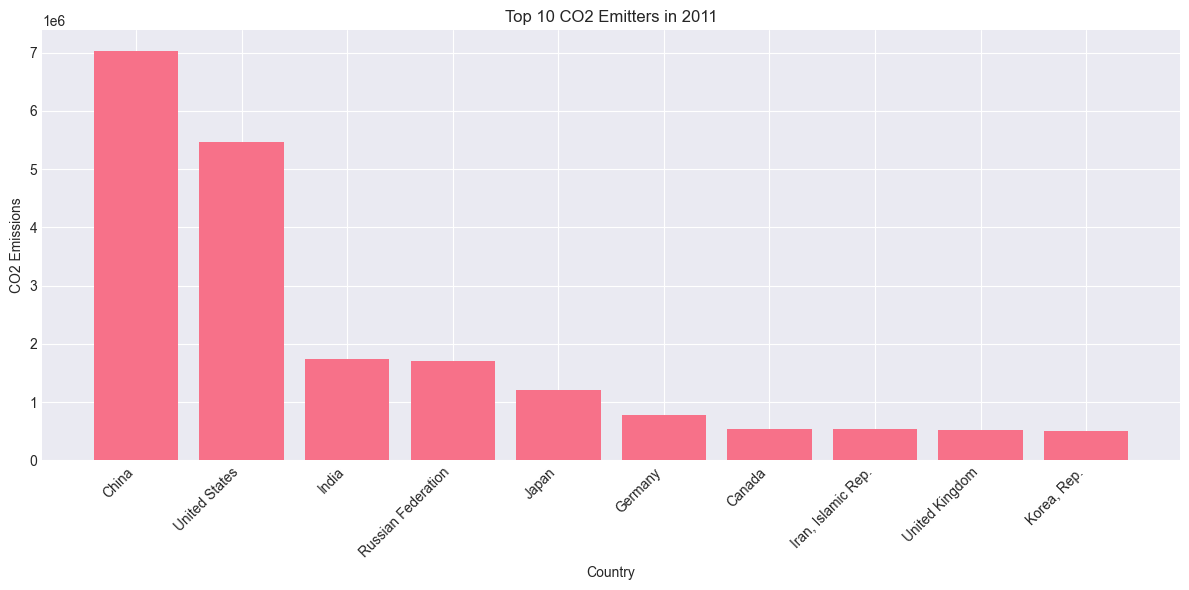

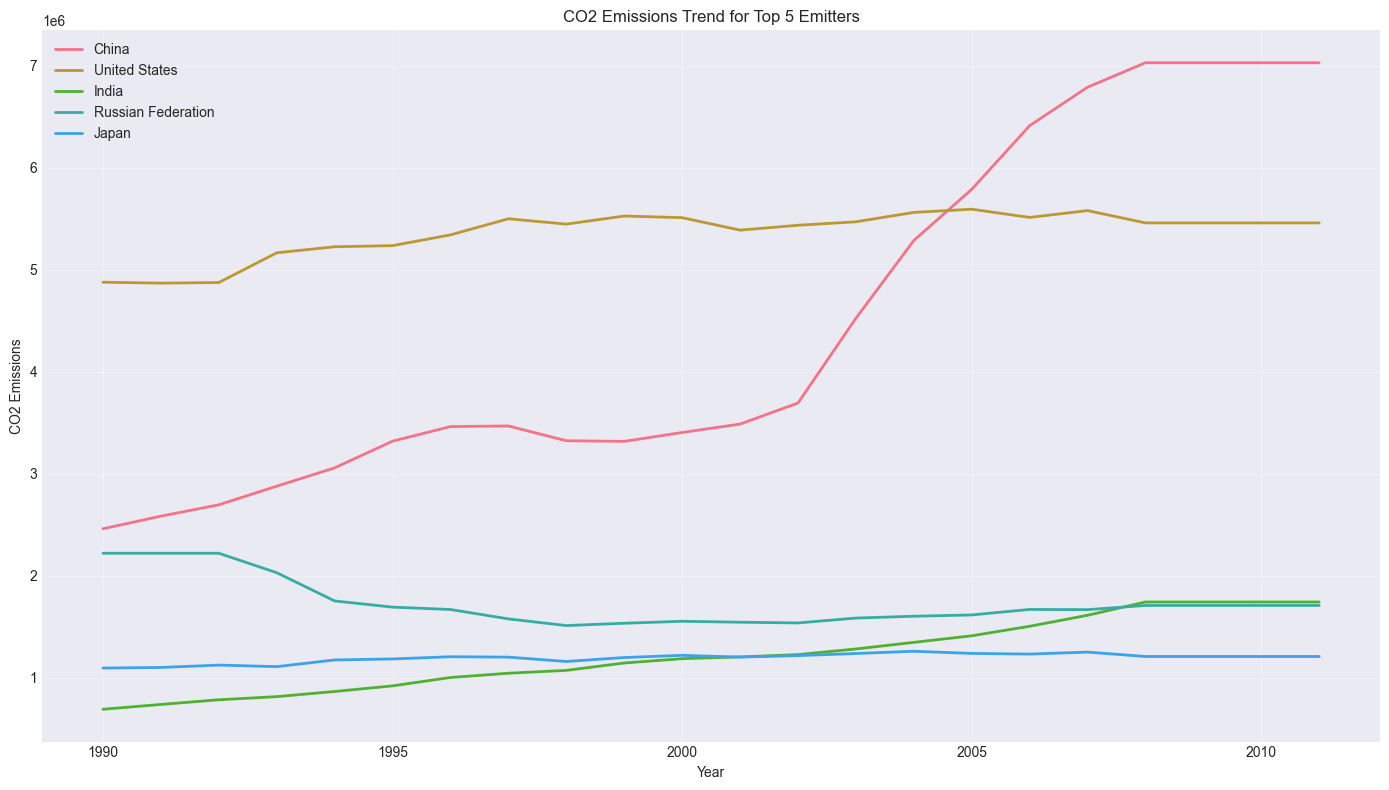

In [19]:
# If CO2 data exists, perform analysis
if co2_col and co2_col in df_cleaned.columns:
    # Ensure the CO2 column is numeric
    df_cleaned[co2_col] = pd.to_numeric(df_cleaned[co2_col], errors='coerce')
    
    # Drop rows with NaN in CO2 column for analysis
    df_temp = df_cleaned[df_cleaned[co2_col].notna()].copy()
    
    # Top 10 CO2 emitters (latest year)
    latest_year = df_temp['Year'].max()
    latest_data = df_temp[df_temp['Year'] == latest_year]
    if len(latest_data) > 0:
        top_emitters = latest_data.nlargest(10, co2_col)
        
        plt.figure(figsize=(12, 6))
        # Convert to lists to avoid TypeError
        countries = top_emitters['Country name'].tolist()
        values = top_emitters[co2_col].tolist()
        plt.bar(countries, values)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top 10 CO2 Emitters in {latest_year}')
        plt.xlabel('Country')
        plt.ylabel('CO2 Emissions')
        plt.tight_layout()
        plt.show()
        
        # Time series plot for top emitters
        top_countries = top_emitters['Country code'].tolist()[:5]
        
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            country_data = df_temp[df_temp['Country code'] == country]
            if len(country_data) > 0:
                plt.plot(country_data['Year'], country_data[co2_col], 
                        label=country_data['Country name'].iloc[0], linewidth=2)
        
        plt.xlabel('Year')
        plt.ylabel('CO2 Emissions')
        plt.title('CO2 Emissions Trend for Top 5 Emitters')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

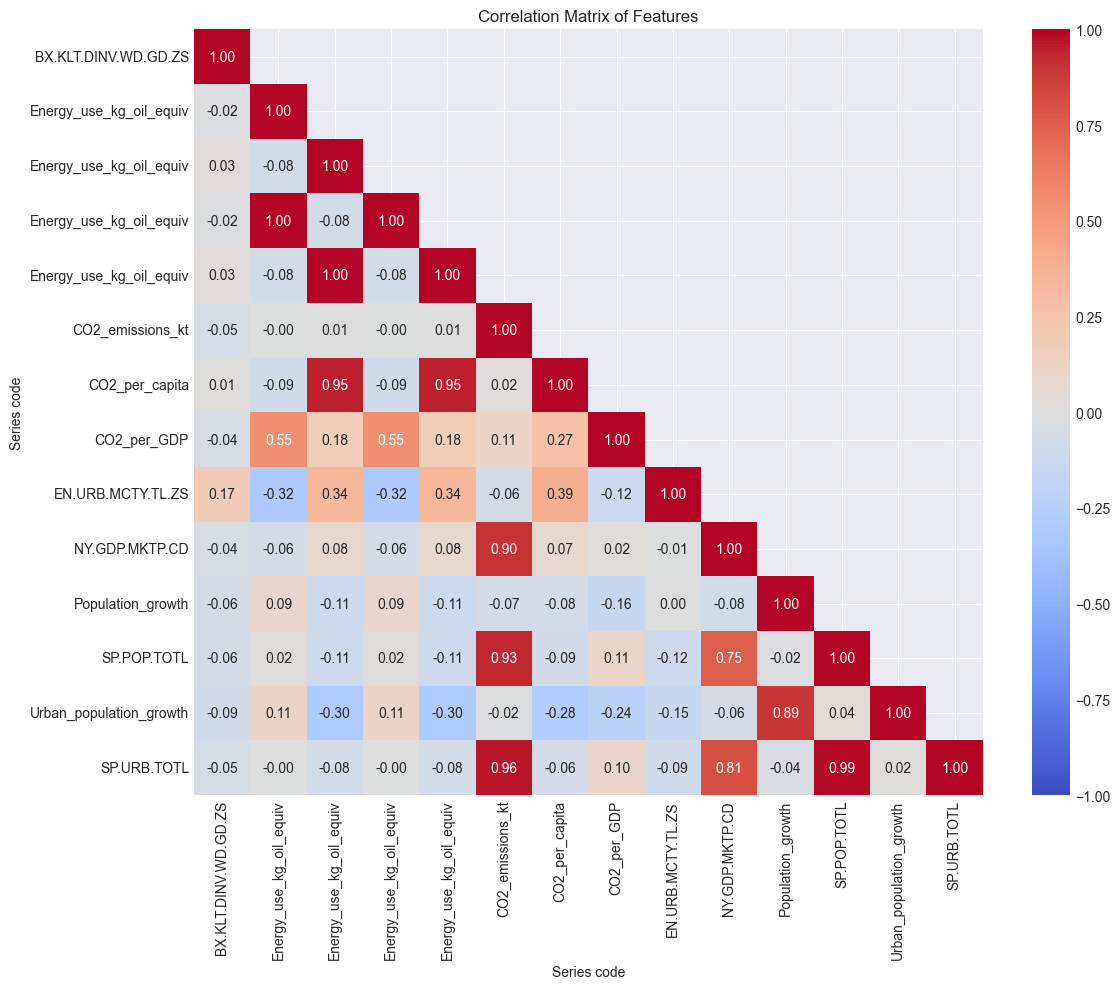

In [20]:
# Correlation analysis
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Year']

if len(numeric_cols) > 1:
    # Calculate correlation matrix
    corr_matrix = df_cleaned[numeric_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Features')
    plt.tight_layout()
    plt.show()

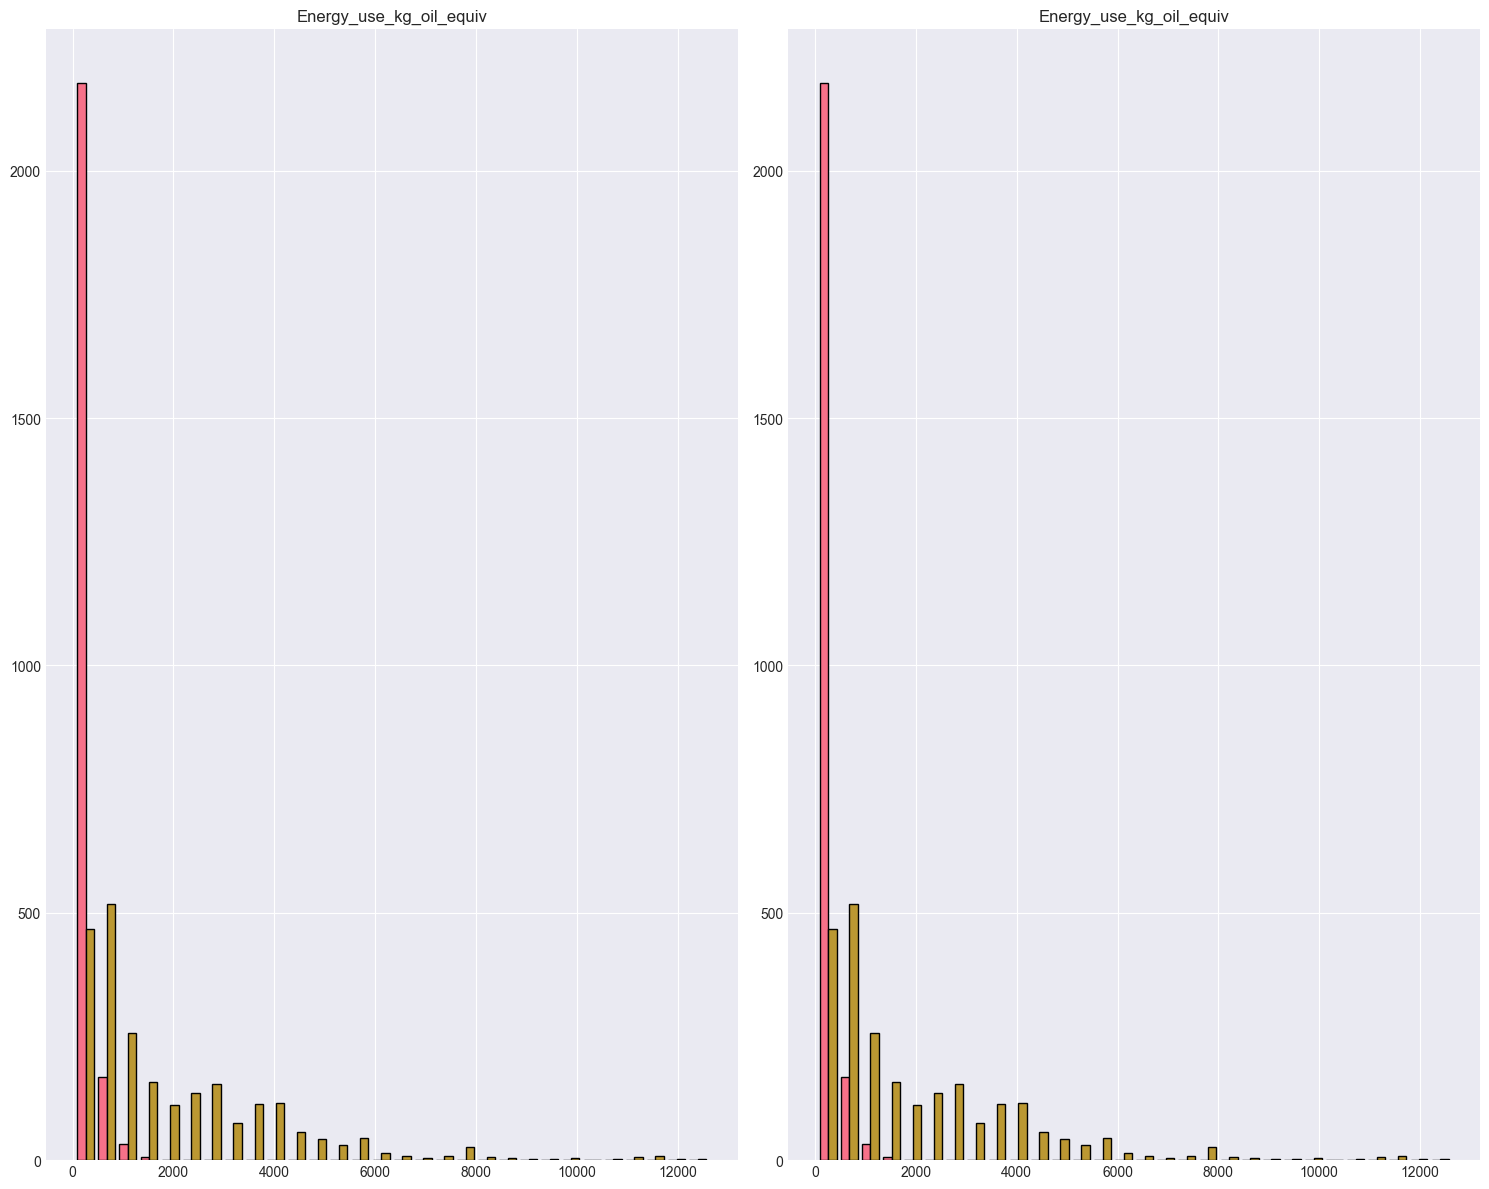

In [21]:
# Distribution plots for numeric features
if len(numeric_cols) > 0:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        if idx < len(axes):
            df_cleaned[col].hist(bins=30, ax=axes[idx], edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}')
            axes[idx].set_xlabel(col)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

### Additional Visualizations


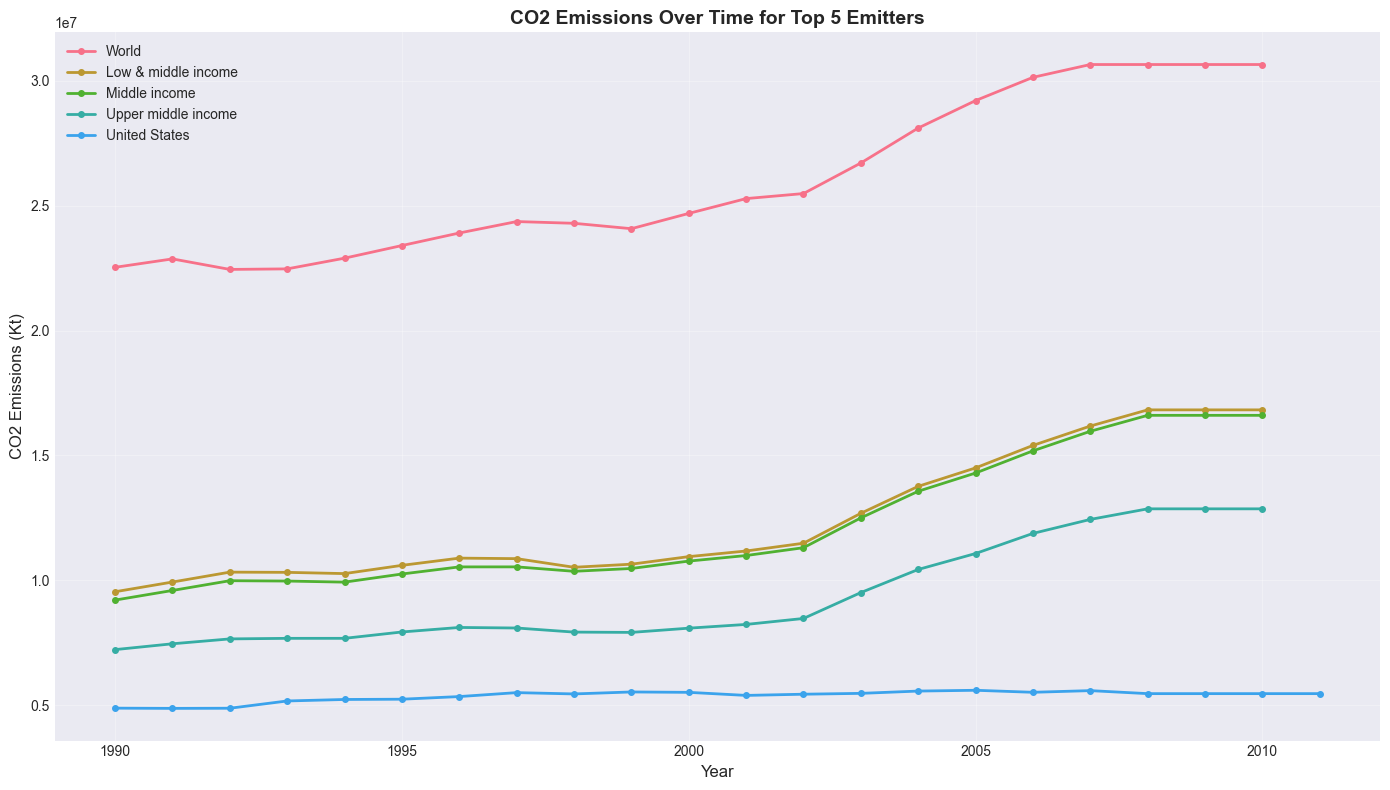

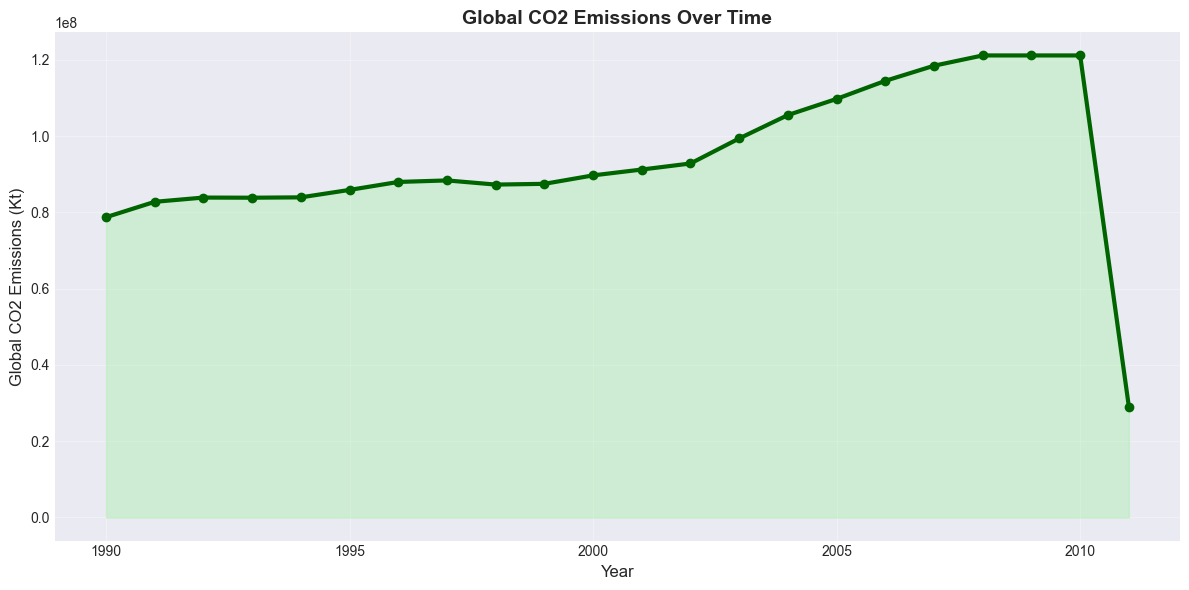

In [24]:
# 1. CO₂ Emissions Over Time for Selected Countries
# Load the cleaned data first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reload cleaned data to ensure we have it
df_cleaned = pd.read_csv('../data/cleaned_country_data.csv')

# Check if CO2 emissions column exists
if 'EN.ATM.CO2E.KT' in df_cleaned.columns:
    # Select top 5 countries based on total CO2 emissions
    co2_by_country = df_cleaned.groupby('Country name')['EN.ATM.CO2E.KT'].sum()
    co2_by_country = co2_by_country.dropna().sort_values(ascending=False)
    
    if len(co2_by_country) > 0:
        top_countries = co2_by_country.head(5).index.tolist()
        
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            country_data = df_cleaned[df_cleaned['Country name'] == country].copy()
            country_data = country_data.dropna(subset=['Year', 'EN.ATM.CO2E.KT'])
            country_data = country_data.sort_values('Year')
            
            if len(country_data) > 0:
                plt.plot(country_data['Year'], country_data['EN.ATM.CO2E.KT'], 
                        marker='o', markersize=4, label=country, linewidth=2)
        
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('CO2 Emissions (Kt)', fontsize=12)
        plt.title('CO2 Emissions Over Time for Top 5 Emitters', fontsize=14, fontweight='bold')
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Global CO2 emissions over time
        global_emissions = df_cleaned.groupby('Year')['EN.ATM.CO2E.KT'].sum()
        
        if len(global_emissions) > 0:
            plt.figure(figsize=(12, 6))
            plt.plot(global_emissions.index, global_emissions.values, 
                    marker='o', color='darkgreen', linewidth=3, markersize=6)
            plt.fill_between(global_emissions.index, global_emissions.values, 
                            alpha=0.3, color='lightgreen')
            plt.xlabel('Year', fontsize=12)
            plt.ylabel('Global CO2 Emissions (Kt)', fontsize=12)
            plt.title('Global CO2 Emissions Over Time', fontsize=14, fontweight='bold')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
    else:
        print("No CO2 emissions data available for plotting")
else:
    print("CO2 emissions column not found in the dataset")

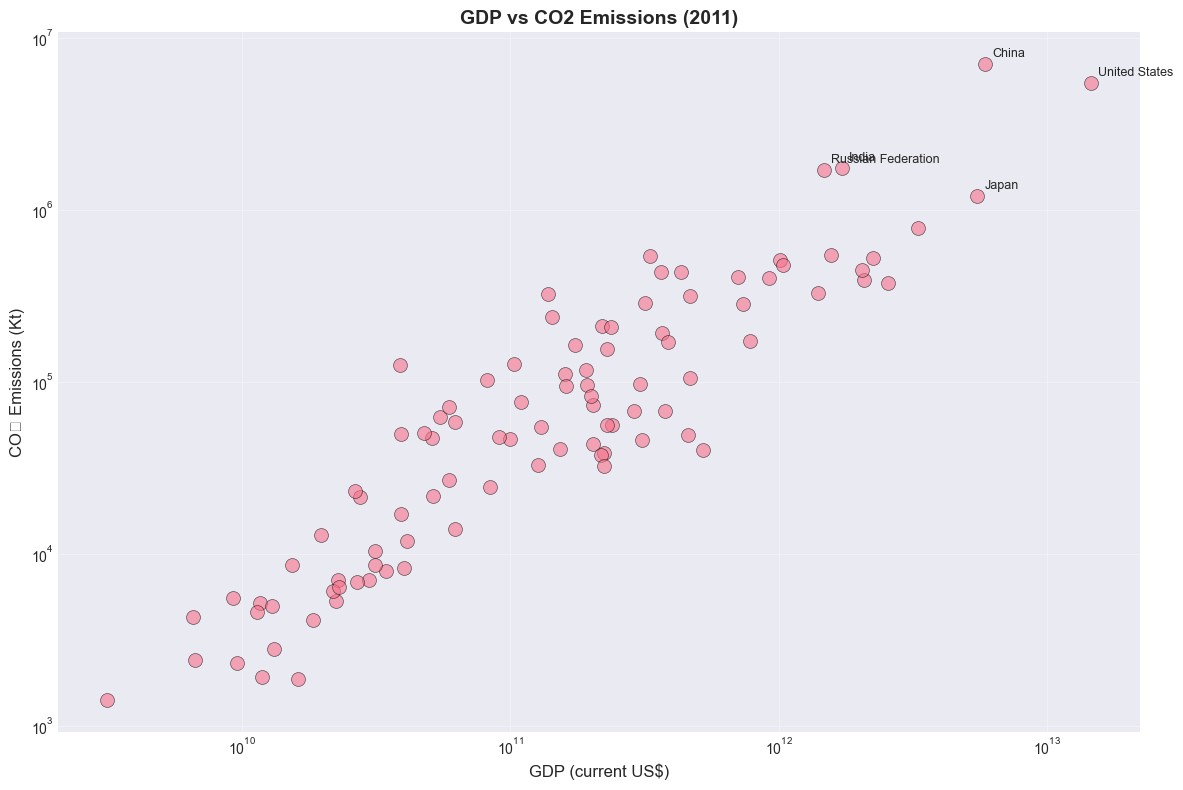

In [26]:
# 2. GDP vs CO₂ Emissions
# Use the latest year data for clearer visualization
if 'EN.ATM.CO2E.KT' in df_cleaned.columns and 'NY.GDP.MKTP.CD' in df_cleaned.columns:
    latest_year = df_cleaned['Year'].max()
    latest_data = df_cleaned[df_cleaned['Year'] == latest_year].copy()
    latest_data = latest_data.dropna(subset=['NY.GDP.MKTP.CD', 'EN.ATM.CO2E.KT'])
    
    if len(latest_data) > 0:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(latest_data['NY.GDP.MKTP.CD'], latest_data['EN.ATM.CO2E.KT'], 
                             alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
        
        # Add labels for top emitters
        if len(latest_data) >= 5:
            top_emitters = latest_data.nlargest(5, 'EN.ATM.CO2E.KT')
        else:
            top_emitters = latest_data.nlargest(len(latest_data), 'EN.ATM.CO2E.KT')
            
        for idx, row in top_emitters.iterrows():
            plt.annotate(row['Country name'], 
                        (row['NY.GDP.MKTP.CD'], row['EN.ATM.CO2E.KT']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('GDP (current US$)', fontsize=12)
        plt.ylabel('CO₂ Emissions (Kt)', fontsize=12)
        plt.title(f'GDP vs CO2 Emissions ({latest_year})', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for GDP vs CO2 emissions plot in {latest_year}")
else:
    print("Required columns for GDP vs CO2 plot not found")

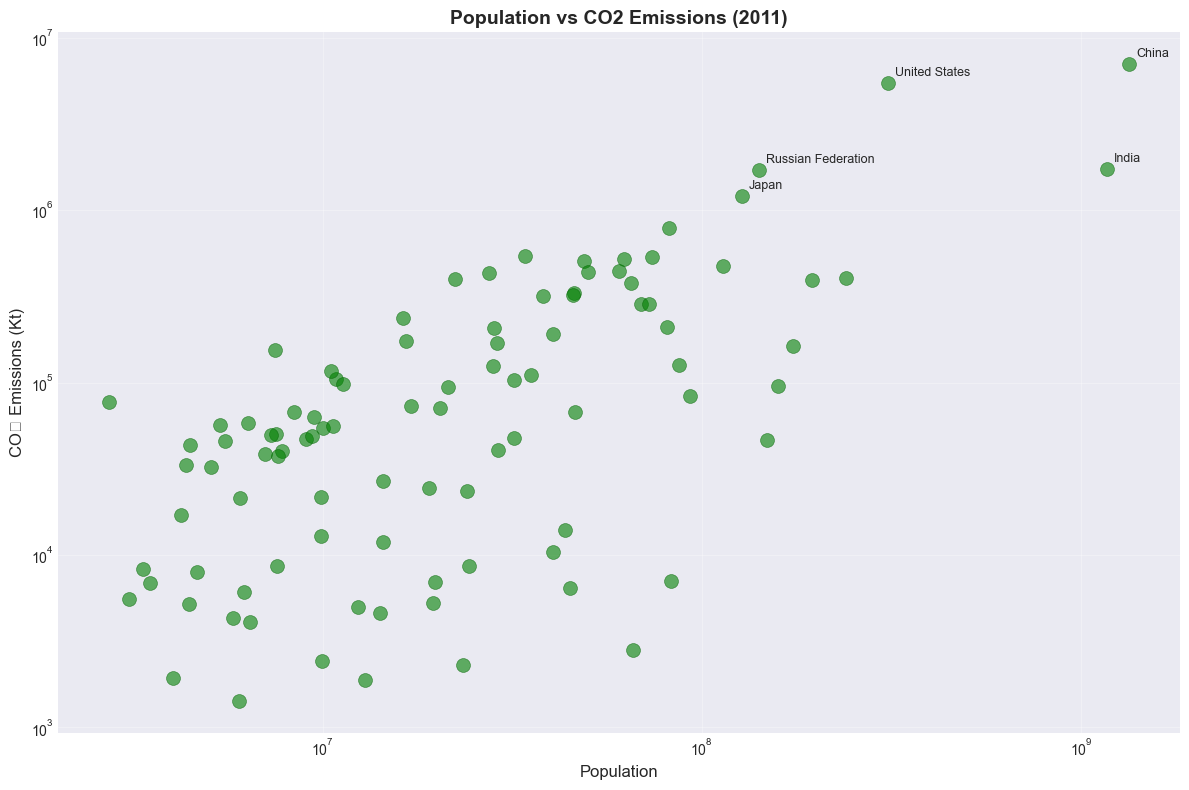

In [28]:
# 3. Population vs CO₂ Emissions
if 'EN.ATM.CO2E.KT' in df_cleaned.columns and 'SP.POP.TOTL' in df_cleaned.columns:
    # Use latest_data from previous cell if available, otherwise recreate
    if 'latest_data' not in locals():
        latest_year = df_cleaned['Year'].max()
        latest_data = df_cleaned[df_cleaned['Year'] == latest_year].copy()
    
    latest_data_pop = latest_data.dropna(subset=['SP.POP.TOTL', 'EN.ATM.CO2E.KT'])
    
    if len(latest_data_pop) > 0:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(latest_data_pop['SP.POP.TOTL'], latest_data_pop['EN.ATM.CO2E.KT'], 
                             alpha=0.6, s=100, color='green', edgecolors='darkgreen', linewidth=0.5)
        
        # Add labels for top emitters
        if len(latest_data_pop) >= 5:
            top_emitters = latest_data_pop.nlargest(5, 'EN.ATM.CO2E.KT')
        else:
            top_emitters = latest_data_pop.nlargest(len(latest_data_pop), 'EN.ATM.CO2E.KT')
            
        for idx, row in top_emitters.iterrows():
            plt.annotate(row['Country name'], 
                        (row['SP.POP.TOTL'], row['EN.ATM.CO2E.KT']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Population', fontsize=12)
        plt.ylabel('CO₂ Emissions (Kt)', fontsize=12)
        plt.title(f'Population vs CO2 Emissions ({latest_year})', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for Population vs CO2 emissions plot")
else:
    print("Required columns for Population vs CO2 plot not found")

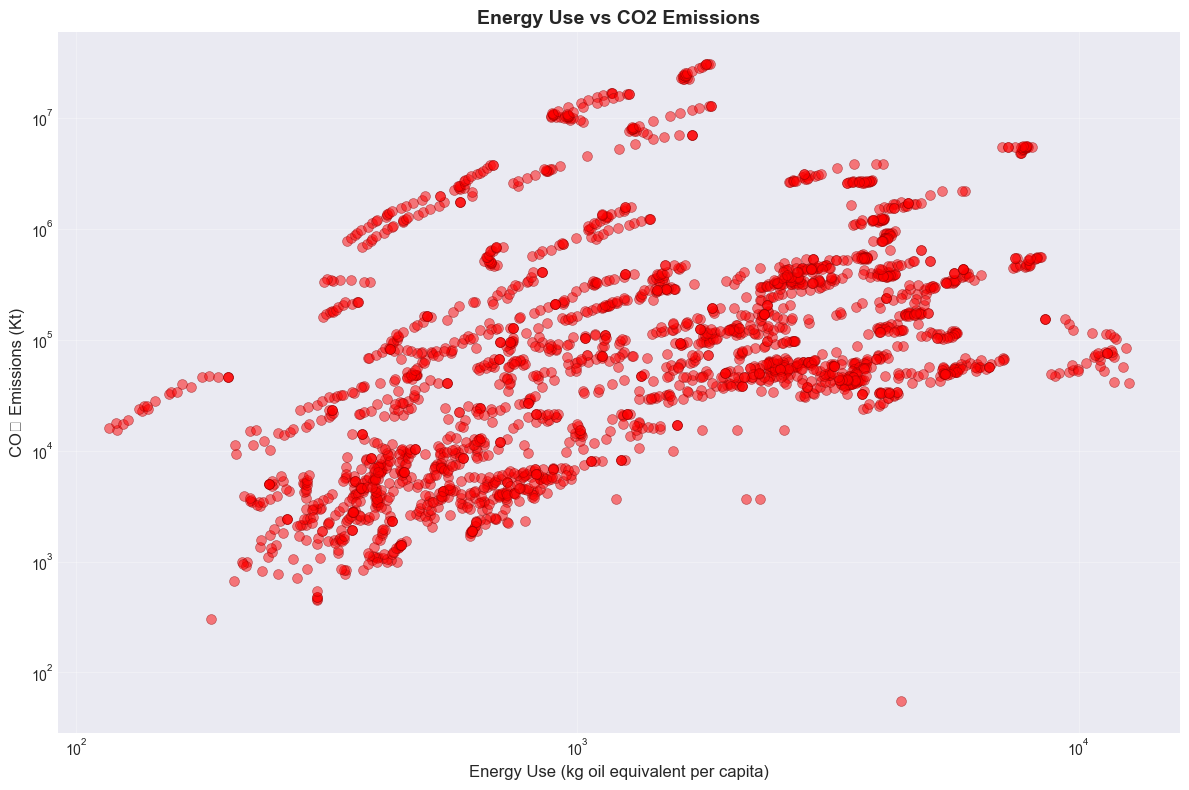

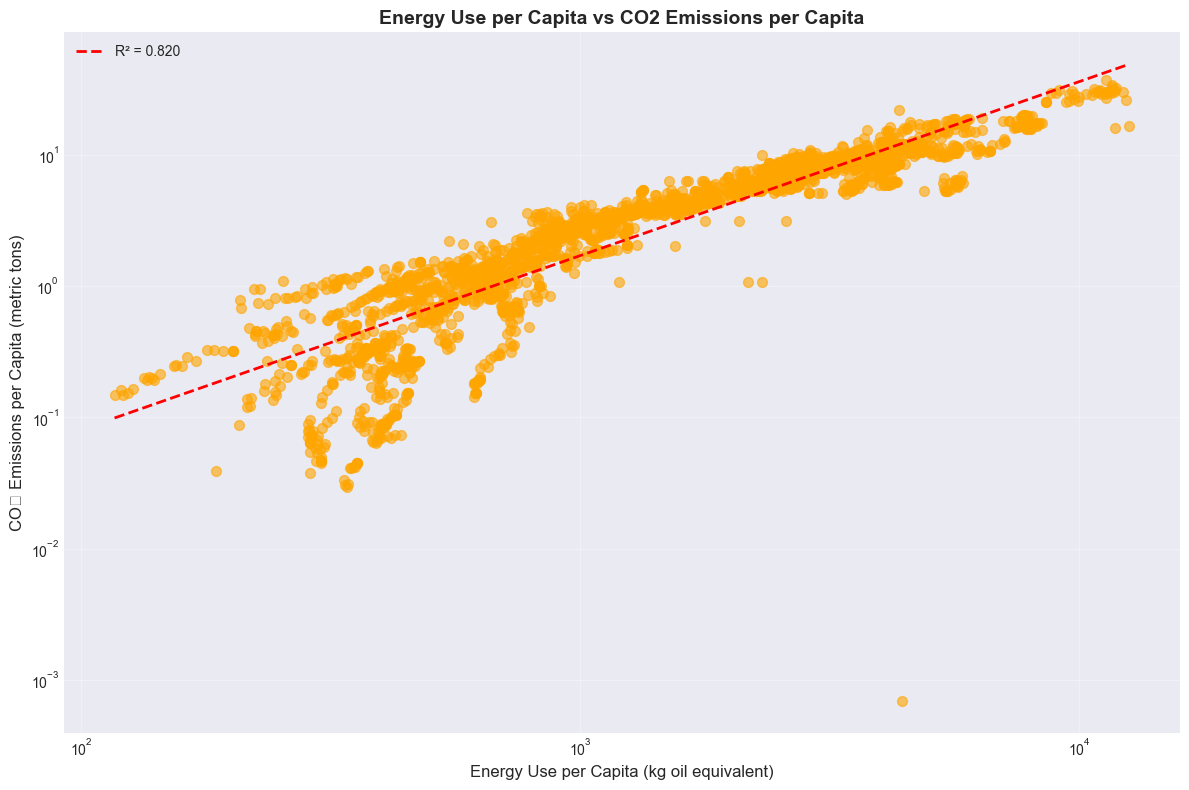

In [30]:
# 4. Energy Use vs CO₂ Emissions
if 'EN.ATM.CO2E.KT' in df_cleaned.columns and 'EG.USE.PCAP.KG.OE' in df_cleaned.columns:
    energy_data = df_cleaned.dropna(subset=['EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT'])
    
    if len(energy_data) > 0:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(energy_data['EG.USE.PCAP.KG.OE'], energy_data['EN.ATM.CO2E.KT'], 
                             alpha=0.5, s=50, color='red', edgecolors='darkred', linewidth=0.5)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Energy Use (kg oil equivalent per capita)', fontsize=12)
        plt.ylabel('CO₂ Emissions (Kt)', fontsize=12)
        plt.title('Energy Use vs CO2 Emissions', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for Energy Use vs CO2 emissions plot")
    
    # Relationship between energy use per capita and CO2 per capita
    if 'EN.ATM.CO2E.PC' in df_cleaned.columns:
        per_capita_data = df_cleaned.dropna(subset=['EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.PC'])
        
        if len(per_capita_data) > 0:
            plt.figure(figsize=(12, 8))
            scatter = plt.scatter(per_capita_data['EG.USE.PCAP.KG.OE'], per_capita_data['EN.ATM.CO2E.PC'], 
                                 alpha=0.6, s=50, color='orange')
            
            # Add a trend line with proper error handling
            try:
                from scipy import stats
                x_data = per_capita_data['EG.USE.PCAP.KG.OE'].values
                y_data = per_capita_data['EN.ATM.CO2E.PC'].values
                
                # Remove any remaining NaN or inf values
                mask = np.isfinite(x_data) & np.isfinite(y_data) & (x_data > 0) & (y_data > 0)
                
                if mask.sum() > 2:
                    x_log = np.log(x_data[mask])
                    y_log = np.log(y_data[mask])
                    
                    slope, intercept, r_value, p_value, std_err = stats.linregress(x_log, y_log)
                    
                    x_trend = np.logspace(np.log10(x_data[mask].min()), 
                                         np.log10(x_data[mask].max()), 100)
                    y_trend = np.exp(intercept) * (x_trend ** slope)
                    
                    plt.plot(x_trend, y_trend, 'r--', linewidth=2, label=f'R² = {r_value**2:.3f}')
                    plt.legend()
            except Exception as e:
                print(f"Could not add trend line: {e}")
            
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel('Energy Use per Capita (kg oil equivalent)', fontsize=12)
            plt.ylabel('CO₂ Emissions per Capita (metric tons)', fontsize=12)
            plt.title('Energy Use per Capita vs CO2 Emissions per Capita', fontsize=14, fontweight='bold')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No data available for per capita energy vs CO2 plot")
else:
    print("Required columns for Energy vs CO2 plots not found")

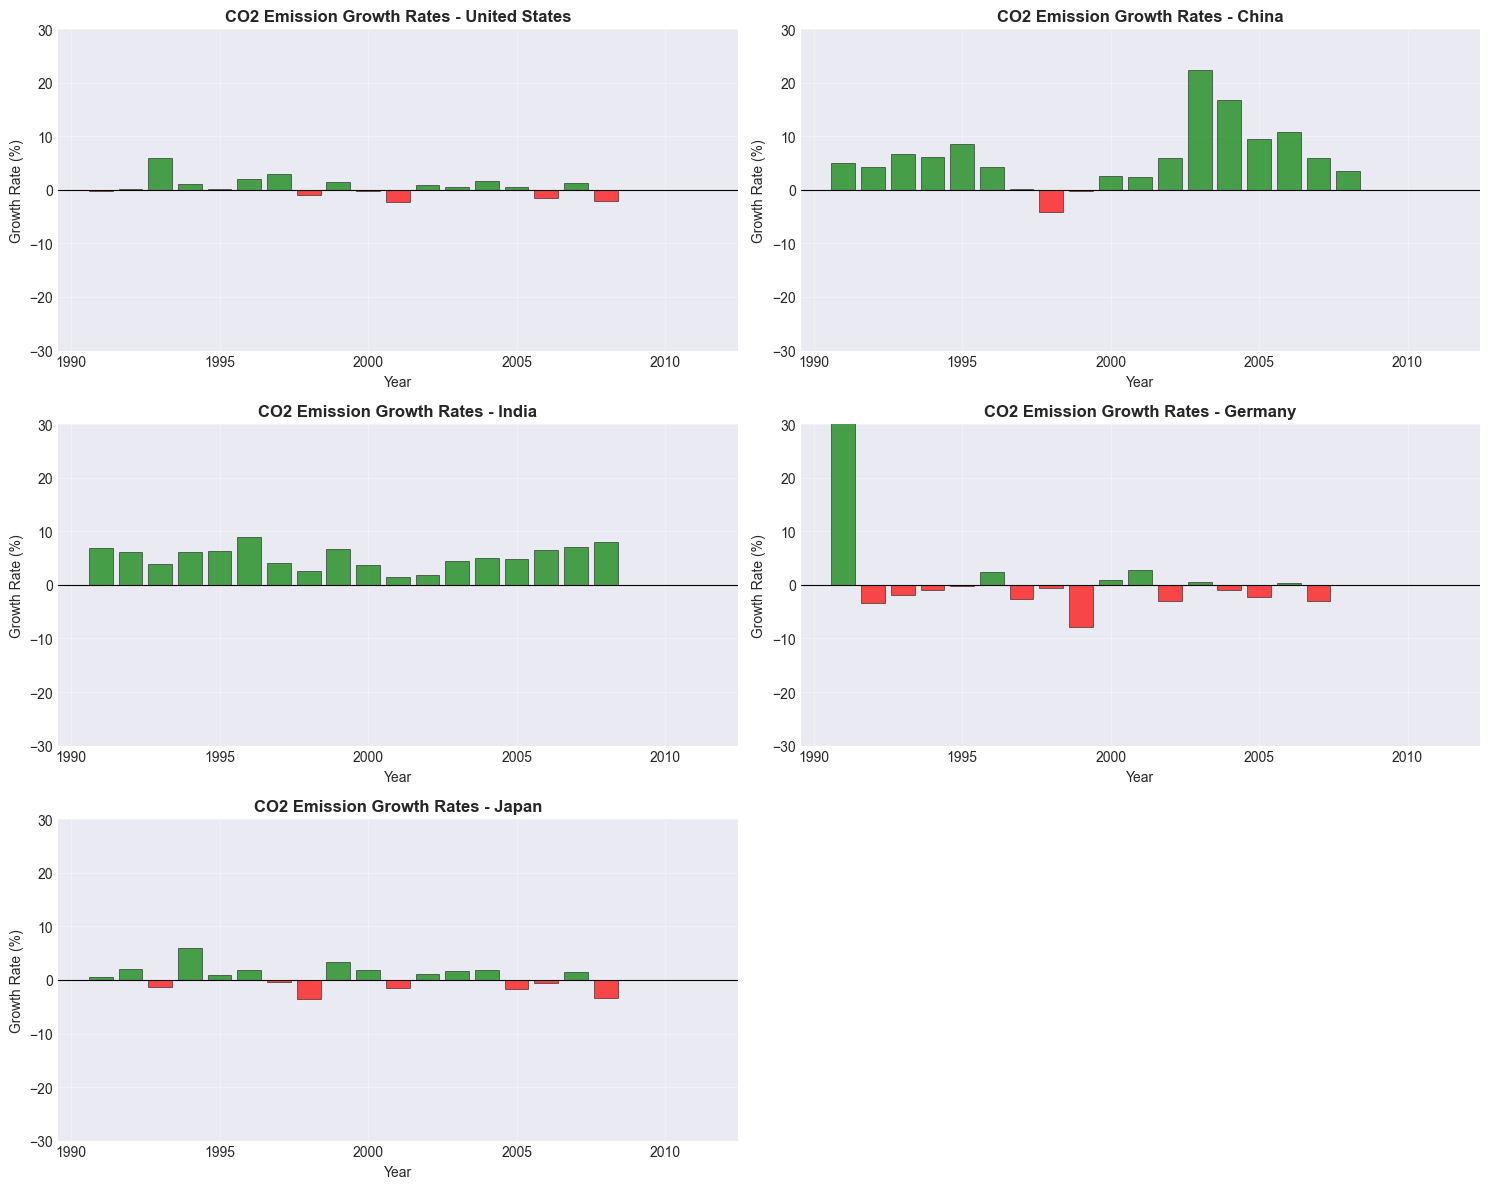

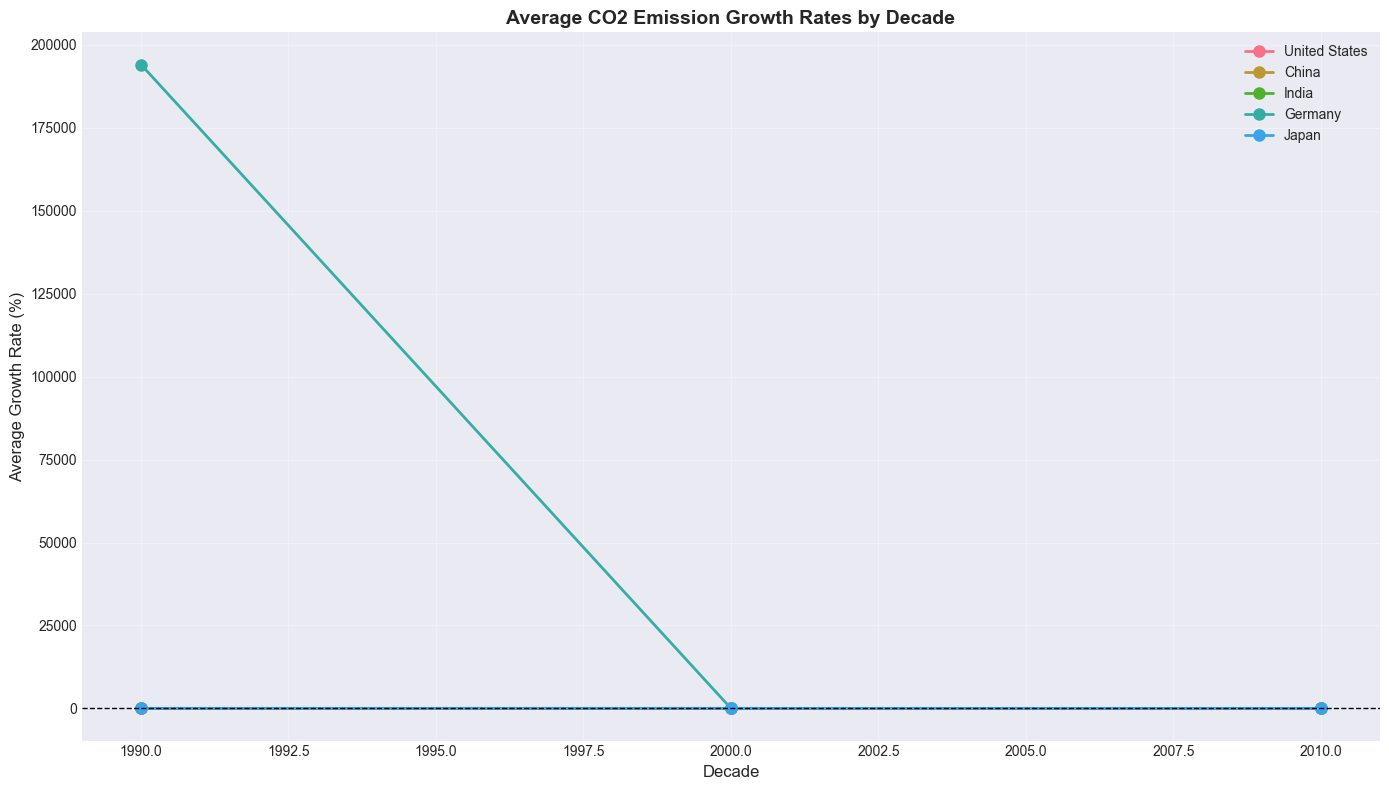

In [32]:
# 5. CO₂ Emission Growth Rates
if 'EN.ATM.CO2E.KT' in df_cleaned.columns:
    # Calculate growth rates
    growth_df = df_cleaned[['Country name', 'Year', 'EN.ATM.CO2E.KT']].copy()
    growth_df = growth_df.dropna(subset=['EN.ATM.CO2E.KT'])
    growth_df = growth_df.sort_values(['Country name', 'Year'])
    growth_df['growth_rate'] = growth_df.groupby('Country name')['EN.ATM.CO2E.KT'].pct_change() * 100
    
    # Define countries to plot
    countries_to_plot = ['United States', 'China', 'India', 'Germany', 'Japan']
    
    # Check which countries exist in the data
    available_countries = growth_df['Country name'].unique()
    countries_found = [c for c in countries_to_plot if c in available_countries]
    
    # If none found, use top 5 emitters
    if len(countries_found) == 0:
        total_emissions = growth_df.groupby('Country name')['EN.ATM.CO2E.KT'].sum()
        countries_found = total_emissions.nlargest(5).index.tolist()
        print(f"Using top 5 emitters: {countries_found}")
    
    if len(countries_found) > 0:
        # Create subplots
        n_countries = len(countries_found)
        n_cols = 2
        n_rows = (n_countries + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
        
        # Handle single row case
        if n_rows == 1 and n_cols > 1:
            axes = axes.reshape(1, -1)
        elif n_rows == 1 and n_cols == 1:
            axes = np.array([[axes]])
        
        axes_flat = axes.flatten() if n_rows * n_cols > 1 else [axes]
        
        for idx, country in enumerate(countries_found):
            country_data = growth_df[growth_df['Country name'] == country].dropna()
            
            if len(country_data) > 0 and idx < len(axes_flat):
                ax = axes_flat[idx]
                colors = ['red' if x < 0 else 'green' for x in country_data['growth_rate']]
                ax.bar(country_data['Year'], country_data['growth_rate'], 
                      color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
                ax.set_title(f'CO2 Emission Growth Rates - {country}', fontweight='bold')
                ax.set_xlabel('Year')
                ax.set_ylabel('Growth Rate (%)')
                ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
                ax.grid(True, alpha=0.3)
                ax.set_ylim(-30, 30)  # Adjusted limits
        
        # Hide unused subplots
        for idx in range(n_countries, len(axes_flat)):
            axes_flat[idx].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Average growth rates by decade
        growth_df['Decade'] = (growth_df['Year'] // 10) * 10
        decade_growth = growth_df.groupby(['Country name', 'Decade'])['growth_rate'].mean().reset_index()
        
        plt.figure(figsize=(14, 8))
        for country in countries_found[:5]:  # Limit to 5 countries
            country_decade = decade_growth[decade_growth['Country name'] == country]
            if len(country_decade) > 0:
                plt.plot(country_decade['Decade'], country_decade['growth_rate'], 
                        marker='o', markersize=8, label=country, linewidth=2)
        
        plt.xlabel('Decade', fontsize=12)
        plt.ylabel('Average Growth Rate (%)', fontsize=12)
        plt.title('Average CO2 Emission Growth Rates by Decade', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
        plt.tight_layout()
        plt.show()
    else:
        print("No country data available for growth rates plot")
else:
    print("CO2 emissions column not found for growth rate analysis")

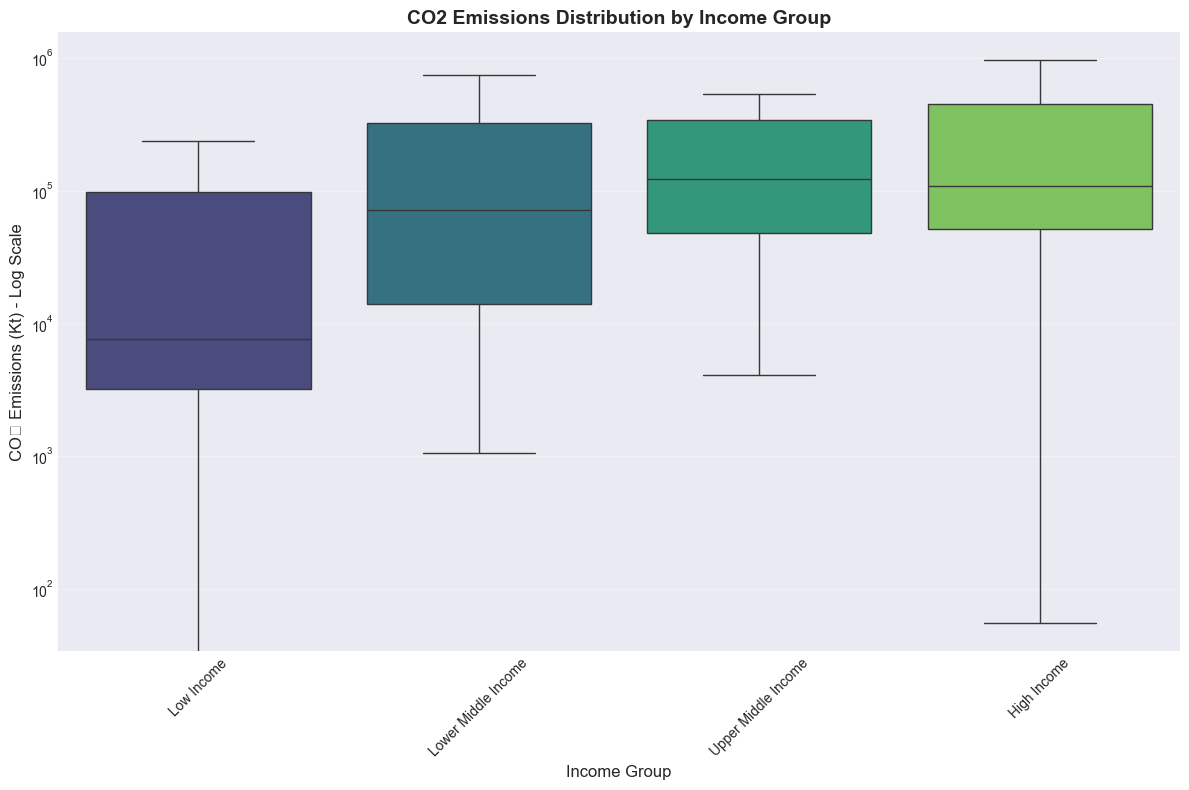

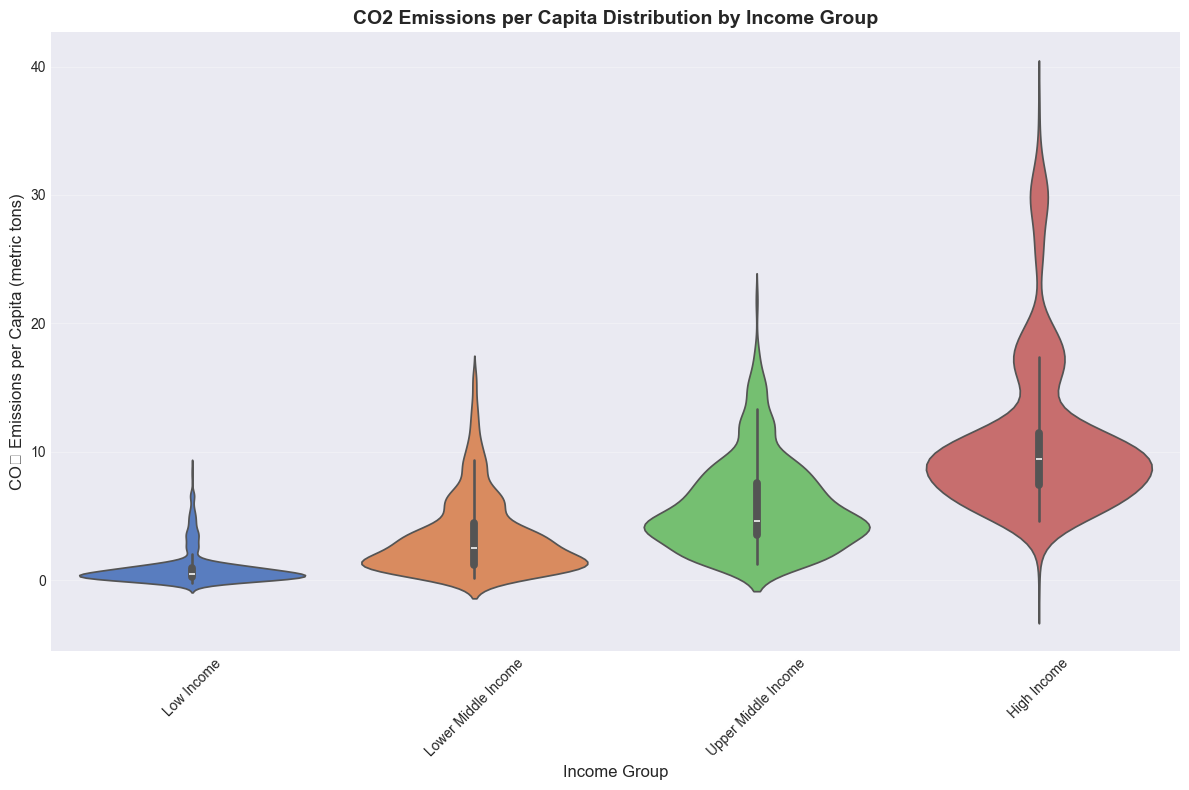


CO₂ Emissions Summary by Income Group:
                             mean       median           std  count
Income_Group                                                       
Low Income           3.619205e+05    7643.8615  1.279930e+06    656
Lower Middle Income  1.075182e+06   71247.9765  2.978910e+06    760
Upper Middle Income  1.821392e+06  122547.4730  6.010022e+06    387
High Income          5.235375e+05  108924.5680  1.093987e+06    583


In [34]:
# 6. CO₂ Emissions by Region (using income groups as proxy for regions)
if all(col in df_cleaned.columns for col in ['EN.ATM.CO2E.KT', 'NY.GDP.MKTP.CD', 'SP.POP.TOTL']):
    # Create income groups based on GDP per capita
    df_region = df_cleaned.copy()
    df_region = df_region.dropna(subset=['NY.GDP.MKTP.CD', 'SP.POP.TOTL'])
    
    # Calculate GDP per capita
    df_region['GDP_per_capita'] = df_region['NY.GDP.MKTP.CD'] / df_region['SP.POP.TOTL']
    
    # Define income groups based on World Bank classifications (simplified)
    def classify_income(gdp_per_capita):
        if pd.isna(gdp_per_capita) or gdp_per_capita <= 0:
            return 'Unknown'
        elif gdp_per_capita < 1000:
            return 'Low Income'
        elif gdp_per_capita < 4000:
            return 'Lower Middle Income'
        elif gdp_per_capita < 12000:
            return 'Upper Middle Income'
        else:
            return 'High Income'
    
    df_region['Income_Group'] = df_region['GDP_per_capita'].apply(classify_income)
    
    # Filter out unknown income groups and missing CO2 data
    df_region_clean = df_region[df_region['Income_Group'] != 'Unknown'].copy()
    df_region_clean = df_region_clean.dropna(subset=['EN.ATM.CO2E.KT'])
    
    if len(df_region_clean) > 0:
        # Box plot of emissions by income group
        plt.figure(figsize=(12, 8))
        
        # Create ordered categorical type
        income_order = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income']
        df_region_clean['Income_Group'] = pd.Categorical(df_region_clean['Income_Group'], 
                                                         categories=income_order, 
                                                         ordered=True)
        
        # Remove groups with no data
        groups_with_data = df_region_clean['Income_Group'].value_counts()
        groups_to_plot = [g for g in income_order if g in groups_with_data.index and groups_with_data[g] > 0]
        
        if len(groups_to_plot) > 0:
            df_plot = df_region_clean[df_region_clean['Income_Group'].isin(groups_to_plot)]
            
            sns.boxplot(data=df_plot, x='Income_Group', y='EN.ATM.CO2E.KT', 
                        palette='viridis', showfliers=False)
            plt.yscale('log')
            plt.xlabel('Income Group', fontsize=12)
            plt.ylabel('CO₂ Emissions (Kt) - Log Scale', fontsize=12)
            plt.title('CO2 Emissions Distribution by Income Group', fontsize=14, fontweight='bold')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()
        
        # Violin plot for per capita emissions
        if 'EN.ATM.CO2E.PC' in df_region_clean.columns:
            df_per_capita = df_region_clean.dropna(subset=['EN.ATM.CO2E.PC'])
            
            if len(df_per_capita) > 0:
                plt.figure(figsize=(12, 8))
                
                groups_with_pc_data = df_per_capita['Income_Group'].value_counts()
                groups_to_plot_pc = [g for g in income_order if g in groups_with_pc_data.index and groups_with_pc_data[g] > 0]
                
                if len(groups_to_plot_pc) > 0:
                    df_plot_pc = df_per_capita[df_per_capita['Income_Group'].isin(groups_to_plot_pc)]
                    
                    sns.violinplot(data=df_plot_pc, x='Income_Group', y='EN.ATM.CO2E.PC', 
                                   palette='muted', inner='box')
                    plt.xlabel('Income Group', fontsize=12)
                    plt.ylabel('CO₂ Emissions per Capita (metric tons)', fontsize=12)
                    plt.title('CO2 Emissions per Capita Distribution by Income Group', fontsize=14, fontweight='bold')
                    plt.xticks(rotation=45)
                    plt.grid(True, alpha=0.3, axis='y')
                    plt.tight_layout()
                    plt.show()
        
        # Summary statistics by income group
        summary_stats = df_region_clean.groupby('Income_Group')['EN.ATM.CO2E.KT'].agg(['mean', 'median', 'std', 'count'])
        print("\nCO₂ Emissions Summary by Income Group:")
        print(summary_stats)
    else:
        print("No data available for income group analysis")
else:
    print("Required columns for income group analysis not found")

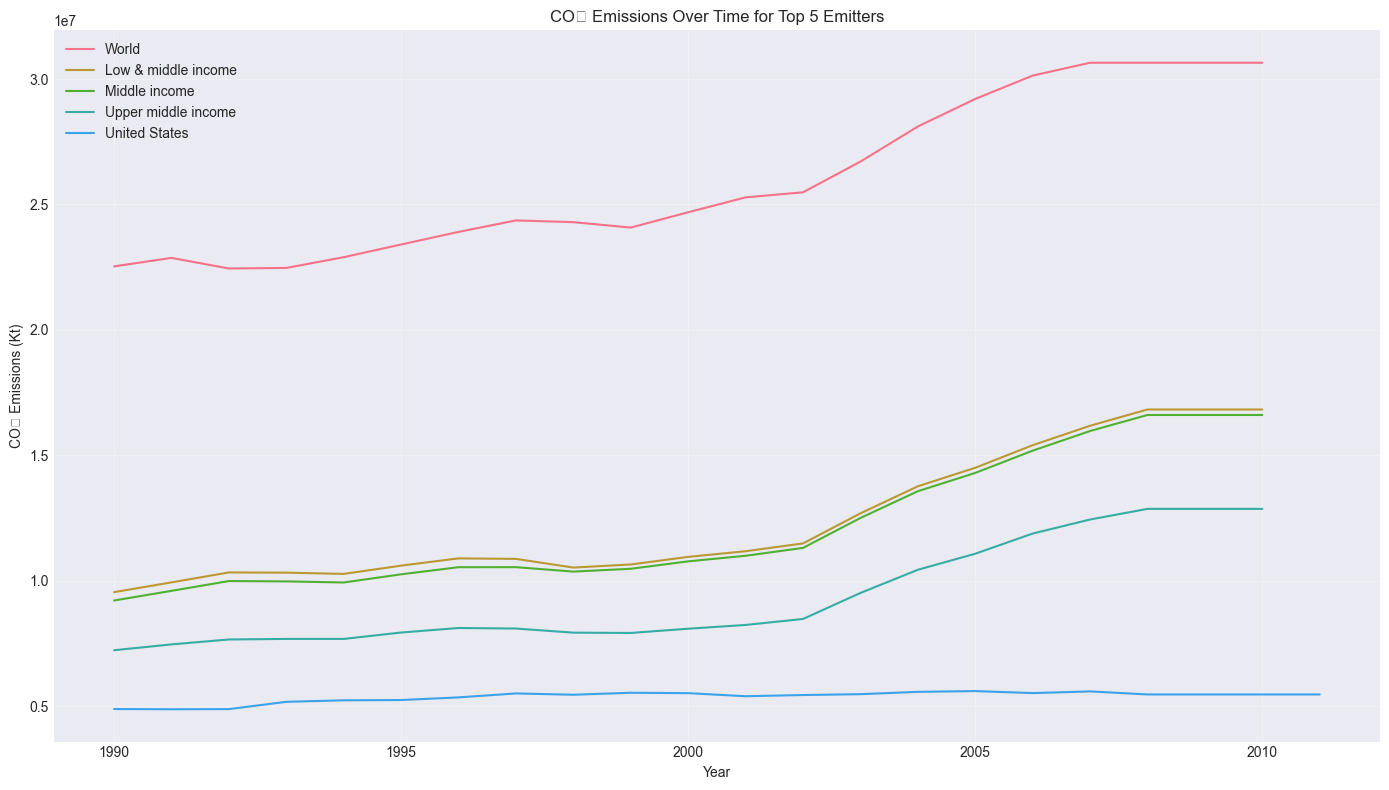

In [ ]:
import matplotlib.pyplot as plt

# Load the cleaned data if not already loaded
import pandas as pd
df_cleaned = pd.read_csv('../data/cleaned_country_data.csv')

# Select top 5 countries based on total CO2 emissions
top_countries = df_cleaned.groupby('Country name')['EN.ATM.CO2E.KT'].sum().nlargest(5).index.tolist()

# Plot CO2 emissions over time for selected countries
plt.figure(figsize=(14, 8))
for country in top_countries:
    country_data = df_cleaned[df_cleaned['Country name'] == country]
    plt.plot(country_data['Year'], country_data['EN.ATM.CO2E.KT'], label=country)

plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Kt)')
plt.title('CO2 Emissions Over Time for Top 5 Emitters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [ ]:
# Create new features
df_features = df_cleaned.copy()

# Check available columns for feature engineering
print("Available columns for feature engineering:")
print(df_features.columns.tolist())

# Get numeric columns for feature engineering
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Year']

# Find actual column names
population_col = 'SP.POP.TOTL' if 'SP.POP.TOTL' in df_features.columns else None
co2_col = 'EN.ATM.CO2E.KT' if 'EN.ATM.CO2E.KT' in df_features.columns else None
gdp_col = 'NY.GDP.MKTP.CD' if 'NY.GDP.MKTP.CD' in df_features.columns else None
energy_col = 'EG.USE.PCAP.KG.OE' if 'EG.USE.PCAP.KG.OE' in df_features.columns else None

print(f"Column mapping:")
print(f"  Population: {population_col}")
print(f"  CO2: {co2_col}")
print(f"  GDP: {gdp_col}")
print(f"  Energy: {energy_col}")

# Create per capita features if population data exists
if population_col:
    # CO2 per capita (if not already present)
    if co2_col and 'EN.ATM.CO2E.PC' not in df_features.columns:
        df_features['CO2_per_capita_calc'] = df_features[co2_col] / df_features[population_col]
    
    # GDP per capita
    if gdp_col:
        df_features['GDP_per_capita'] = df_features[gdp_col] / df_features[population_col]
    
    # Energy use is already per capita (kg oil equivalent per capita)
    # So we don't need to calculate it

# Create lagged features for time series
lag_features = []
if co2_col and co2_col in df_features.columns:
    for lag in [1, 2, 3]:
        lag_col = f'{co2_col}_lag{lag}'
        df_features[lag_col] = df_features.groupby('Country code')[co2_col].shift(lag)
        lag_features.append(lag_col)

# Create moving averages
if co2_col and co2_col in df_features.columns:
    for window in [3, 5]:
        ma_col = f'{co2_col}_ma{window}'
        df_features[ma_col] = df_features.groupby('Country code')[co2_col].rolling(window=window).mean().reset_index(0, drop=True)

# Year-over-year growth rates (limit to key indicators to avoid too many features)
growth_features = []
key_cols_for_growth = [co2_col, gdp_col, population_col]
key_cols_for_growth = [col for col in key_cols_for_growth if col is not None and col in df_features.columns]

for col in key_cols_for_growth:
    growth_col = f'{col}_growth_rate'
    df_features = df_features.sort_values(['Country code', 'Year'])
    df_features[growth_col] = df_features.groupby('Country code')[col].pct_change()
    growth_features.append(growth_col)

# Drop rows with NaN created by lagging and growth calculations
df_features = df_features.dropna()

print(f"\nFeature engineered dataset shape: {df_features.shape}")
print(f"New features created: {df_features.shape[1] - df_cleaned.shape[1]}")

In [ ]:
# Save feature-engineered dataset
df_features.to_csv('../data/features_country_data.csv', index=False)
print("Feature-engineered data saved!")

# Display summary statistics
print("\nSummary statistics of engineered features:")
df_features.describe()

## 6. Data Quality Report

In [ ]:
# Generate data quality report
print("=== Data Quality Report ===")
print(f"\nOriginal dataset shape: {df_raw.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Feature-engineered dataset shape: {df_features.shape}")
print(f"\nNumber of countries: {df_features['Country code'].nunique()}")
print(f"Year range: {df_features['Year'].min()} - {df_features['Year'].max()}")
print(f"\nColumns in final dataset:")
for col in df_features.columns:
    print(f"  - {col}")

# Save column descriptions
column_descriptions = {
    'Country code': 'ISO country code',
    'Country name': 'Full country name',
    'Year': 'Year of observation',
}

# Add descriptions for other columns based on what we found
for col in df_features.columns:
    if col not in column_descriptions:
        if 'CO2' in col:
            column_descriptions[col] = 'CO2 emissions related metric'
        elif 'GDP' in col:
            column_descriptions[col] = 'Gross Domestic Product related metric'
        elif 'Population' in col:
            column_descriptions[col] = 'Population related metric'
        elif 'Energy' in col or 'energy' in col:
            column_descriptions[col] = 'Energy consumption related metric'
        elif 'lag' in col:
            column_descriptions[col] = 'Lagged feature for time series analysis'
        elif 'ma' in col:
            column_descriptions[col] = 'Moving average feature'
        elif 'growth_rate' in col:
            column_descriptions[col] = 'Year-over-year growth rate'
        elif 'per_capita' in col:
            column_descriptions[col] = 'Per capita calculation'

# Save column descriptions
import json
with open('../data/column_descriptions.json', 'w') as f:
    json.dump(column_descriptions, f, indent=2)

print("\nData cleaning and feature engineering completed successfully!")